In [232]:
import pandas as pd
import numpy as np
import pybaseball as pb
import matplotlib.pyplot as plt
import seaborn as sns

Let's start with Logan Webb

In [233]:
webb = pb.statcast_pitcher('2023-03-30', '2023-10-01', 657277)

In [234]:
cond = (webb['on_1b'].notna() & webb['outs_when_up'].isin([0, 1]))
webb['dp_scenario'] = np.where(cond, 1, 0)

In [235]:
webb.groupby('dp_scenario')['pitch_type'].count()

dp_scenario
0    1652
1     289
Name: pitch_type, dtype: int64

In [236]:
webb = webb.join(pd.get_dummies(webb['pitch_type'], prefix='is'))

The changeup is Webb's signature groundball pitch

In [237]:
webb.groupby('pitch_type')['launch_angle'].mean().round()

pitch_type
CH    -9.0
FF    27.0
SI     7.0
SL    22.0
Name: launch_angle, dtype: float64

He leans on it more in double play scenarios

In [238]:
webb.groupby('dp_scenario')[['is_FF', 'is_SI', 'is_CH', 'is_SL']].mean().round(2)

,is_FF,is_SI,is_CH,is_SL
dp_scenario,,,,
0,0.04,0.38,0.36,0.22
1,0.03,0.39,0.43,0.16


He tends to get more ground balls in double play scenarios

In [239]:
webb.groupby('dp_scenario')['launch_angle'].mean().round()

dp_scenario
0    4.0
1   -1.0
Name: launch_angle, dtype: float64

In [240]:
webb = webb.join(pd.get_dummies(webb['events'], prefix='is'))

In [241]:
webb['is_GB'] = np.where(webb['launch_angle'] < 0, 1, 0)

In [242]:
P_GB = webb.dropna(subset=['launch_angle']).groupby('dp_scenario')['is_GB'].mean().round(2)

In [243]:
P_GB

dp_scenario
0    0.46
1    0.54
Name: is_GB, dtype: float64

In [244]:
webb['des'].str.contains('ground').mean()

0.3487892838742916

In [245]:
bbe = webb.dropna(subset=['launch_angle'])

In [246]:
df = pb.pitching_stats(2023, qual=100)

In [247]:
df.columns

Index(['IDfg', 'Season', 'Name', 'Team', 'Age', 'W', 'L', 'WAR', 'ERA', 'G',
       ...
       'LA', 'Barrels', 'Barrel%', 'maxEV', 'HardHit', 'HardHit%', 'Events',
       'CStr%', 'CSW%', 'xERA'],
      dtype='object', length=334)

In [248]:
df['GB%'].median()

0.425

Let's define a ground ball pitcher as any pitcher who has > 45% GB rate

In [249]:
df['gb_pitcher'] = np.where(df['GB%'] > 0.45, 1, 0)

In [250]:
df.groupby('gb_pitcher')['ERA', 'xERA'].mean().round(2)

C:\Users\wampl\AppData\Local\Temp\ipykernel_12816\2546960489.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('gb_pitcher')['ERA', 'xERA'].mean().round(2)


,ERA,xERA
gb_pitcher,,
0,3.93,4.11
1,3.67,4.13


In [251]:
pd.qcut(df['GB%'], 5)

7     (0.412, 0.448]
10    (0.377, 0.412]
30    (0.377, 0.412]
3     (0.478, 0.605]
22     (0.27, 0.377]
1     (0.478, 0.605]
11    (0.478, 0.605]
8     (0.478, 0.605]
5     (0.478, 0.605]
19    (0.478, 0.605]
4      (0.27, 0.377]
14    (0.412, 0.448]
34    (0.377, 0.412]
21    (0.377, 0.412]
9     (0.448, 0.478]
16    (0.448, 0.478]
23    (0.448, 0.478]
25     (0.27, 0.377]
2     (0.412, 0.448]
35    (0.412, 0.448]
32    (0.377, 0.412]
33    (0.377, 0.412]
12    (0.478, 0.605]
15    (0.448, 0.478]
17    (0.448, 0.478]
42    (0.448, 0.478]
6     (0.377, 0.412]
39    (0.478, 0.605]
0     (0.412, 0.448]
24    (0.377, 0.412]
26    (0.448, 0.478]
29    (0.478, 0.605]
13    (0.478, 0.605]
27     (0.27, 0.377]
37    (0.448, 0.478]
31    (0.412, 0.448]
41     (0.27, 0.377]
20    (0.412, 0.448]
43    (0.412, 0.448]
36     (0.27, 0.377]
44    (0.448, 0.478]
18     (0.27, 0.377]
46    (0.377, 0.412]
40    (0.377, 0.412]
38     (0.27, 0.377]
28     (0.27, 0.377]
45     (0.27, 0.377]
Name: GB%, dt

In [252]:
df.groupby(pd.qcut(df['GB%'], 2))['ERA', 'xERA'].mean().round(2)

C:\Users\wampl\AppData\Local\Temp\ipykernel_12816\3225055052.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(pd.qcut(df['GB%'], 2))['ERA', 'xERA'].mean().round(2)


,ERA,xERA
GB%,,
"(0.27, 0.425]",4.07,4.08
"(0.425, 0.605]",3.59,4.15


Let's look at the exit velocity and launch angle of double plays in 2023

In [253]:

bbe_2015 = pd.read_csv("C:/Users/wampl/sxwOBA/statcast_data/bbe/bbe_2021.csv")
bbe_2016 = pd.read_csv("C:/Users/wampl/sxwOBA/statcast_data/bbe/bbe_2022.csv")
bbe_2017 = pd.read_csv("C:/Users/wampl/sxwOBA/statcast_data/bbe/bbe_2023.csv")
bbe_2018 = pd.read_csv("C:/Users/wampl/sxwOBA/statcast_data/bbe/bbe_2021.csv")
bbe_2019 = pd.read_csv("C:/Users/wampl/sxwOBA/statcast_data/bbe/bbe_2022.csv")
bbe_2020 = pd.read_csv("C:/Users/wampl/sxwOBA/statcast_data/bbe/bbe_2023.csv")
bbe_2021 = pd.read_csv("C:/Users/wampl/sxwOBA/statcast_data/bbe/bbe_2021.csv")
bbe_2022 = pd.read_csv("C:/Users/wampl/sxwOBA/statcast_data/bbe/bbe_2022.csv")
bbe_2023 = pd.read_csv("C:/Users/wampl/sxwOBA/statcast_data/bbe/bbe_2023.csv")

bbe = pd.concat([bbe_2015, bbe_2016, bbe_2017, bbe_2018, bbe_2019, bbe_2020, bbe_2021, bbe_2022, bbe_2023])

<AxesSubplot: xlabel='launch_speed', ylabel='launch_angle'>

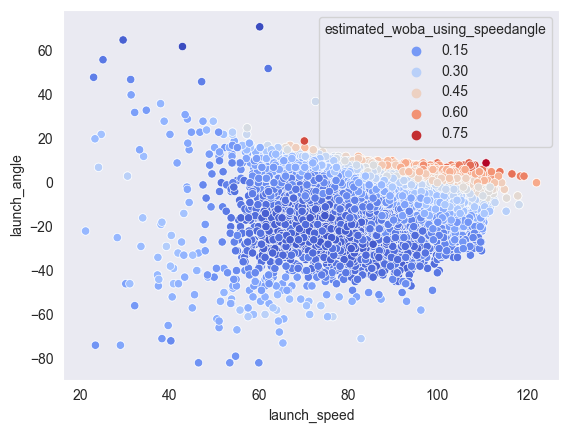

In [254]:
gidp = bbe.loc[bbe['events'] == 'grounded_into_double_play']
sns.scatterplot(data=gidp, x='launch_speed', y='launch_angle', hue='estimated_woba_using_speedangle', palette='coolwarm')

<AxesSubplot: xlabel='launch_speed', ylabel='launch_angle'>

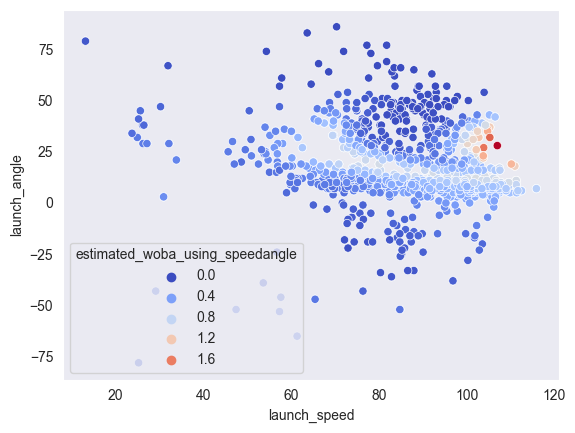

In [255]:
other_dp = bbe.loc[bbe['events'] == 'double_play']
sns.scatterplot(data=other_dp, x='launch_speed', y='launch_angle', hue='estimated_woba_using_speedangle', palette='coolwarm')

In [256]:
gidp[['launch_speed', 'launch_angle']].describe()

,launch_speed,launch_angle
count,26124.000000,26124.000000
mean,88.334210,-9.244832
std,13.514309,12.495475
min,21.200000,-82.000000
25%,79.400000,-17.000000
50%,90.500000,-8.000000
75%,98.900000,0.000000
max,122.200000,71.000000


In [257]:
gidp.loc[gidp['launch_angle'] > 10, ['launch_angle', 'launch_speed', 'description', 'des']].head()

,launch_angle,launch_speed,description,des
1017,15.0,58.5,hit_into_play,"Dodgers challenged (play at 1st), call on the ..."
2135,65.0,29.6,hit_into_play,Eduardo Rodriguez ground bunts into a double p...
3270,11.0,62.6,hit_into_play,"Harrison Bader grounds into a double play, sho..."
6051,13.0,72.0,hit_into_play,"Ben Gamel grounds into a double play, shortsto..."
7499,18.0,57.8,hit_into_play,"Manny Pina grounds into a double play, second ..."


In [258]:
bbe['is_gb'] = np.where(bbe['des'].str.contains('ground'), 1, 0)

<AxesSubplot: >

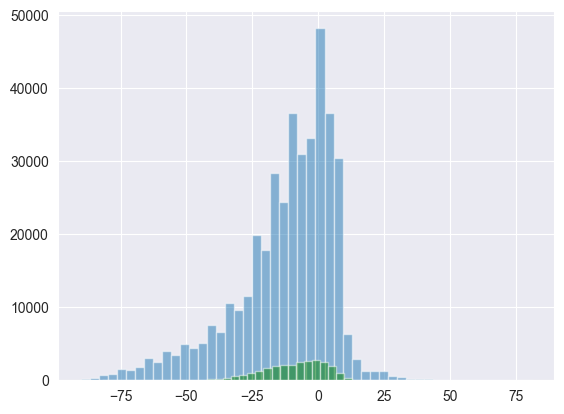

In [259]:
bbe.loc[bbe['is_gb']==1, 'launch_angle'].hist(bins=50, alpha=0.5)
bbe.loc[bbe['events']=='grounded_into_double_play', 'launch_angle'].hist(bins=50, alpha=0.5, color='green')

In [260]:
bbe['is_gidp'] = np.where(bbe['events'] == 'grounded_into_double_play', 1, 0)
bbe['is_gidp'] = pd.to_numeric(bbe['is_gidp'], errors='coerce')

In [261]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve, auc
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(objective='binary:logistic', n_estimators=30, max_depth=3, min_child_weight=2, seed=123, tree_method='gpu_hist', gpu_id=0, verbosity=0, eval_metric='auc')
clf = LogisticRegression(random_state=0)
knn = KNeighborsClassifier(n_neighbors=2500)

In [262]:
X = bbe[['launch_speed', 'launch_angle']]
y = bbe['is_gidp']

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [264]:
xgb_clf.fit(X_train, y_train)
y_pred_proba = xgb_clf.predict_proba(X_test)[:,1] # Use the second column as the predicted probabilities for the positive class

In [265]:
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("ROC AUC score:", roc_auc)

ROC AUC score: 0.8359316499805828


In [266]:
# high_k = KNeighborsClassifier(n_neighbors=2500, n_jobs=-1)
# high_k.fit(X_train, y_train)
# y_pred_proba_knn = high_k.predict_proba(X_test)

In [267]:
# y_pred_proba_knn = y_pred_proba_knn[:,1]
# roc_auc = roc_auc_score(y_test, y_pred_proba_knn)

# print("ROC AUC score:", roc_auc)

In [268]:
fpr, tpr, thhrerholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

Text(0, 0.5, 'True Positive Rate')

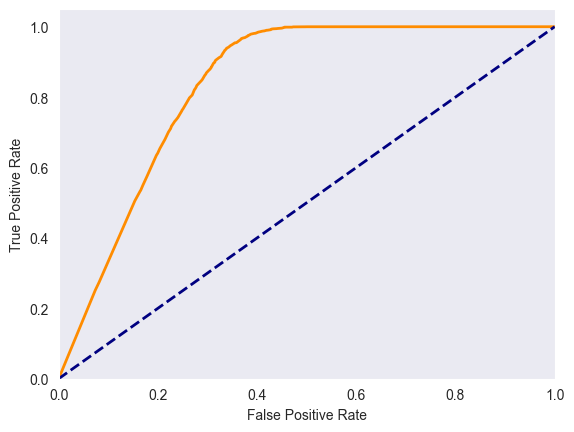

In [269]:
# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

(array([1.88374e+05, 8.11000e+03, 5.61300e+03, 2.89600e+03, 7.08500e+03,
        3.90900e+03, 2.65000e+03, 2.72300e+03, 1.56600e+03, 2.04200e+03,
        1.02500e+03, 3.79500e+03, 7.12000e+02, 1.01700e+03, 3.05400e+03,
        1.05400e+03, 9.20000e+02, 3.02200e+03, 1.38000e+03, 3.44300e+03,
        1.80400e+03, 1.35700e+03, 6.99000e+02, 1.09100e+03, 8.95000e+02,
        1.33000e+03, 1.45100e+03, 1.51000e+02, 2.88300e+03, 3.34300e+03,
        4.02100e+03, 1.00000e+03, 2.23600e+03, 1.62400e+03, 1.90000e+01,
        3.97900e+03, 2.06700e+03, 2.50200e+03, 4.26000e+03, 6.43000e+02,
        4.18300e+03, 1.52100e+03, 3.85200e+03, 4.82200e+03, 7.00900e+03,
        1.27790e+04, 3.86000e+02, 3.35310e+04, 3.20800e+03, 3.00910e+04]),
 array([0.00114087, 0.00274927, 0.00435767, 0.00596607, 0.00757446,
        0.00918286, 0.01079126, 0.01239966, 0.01400806, 0.01561646,
        0.01722486, 0.01883326, 0.02044166, 0.02205006, 0.02365846,
        0.02526686, 0.02687526, 0.02848366, 0.03009206, 0.031700

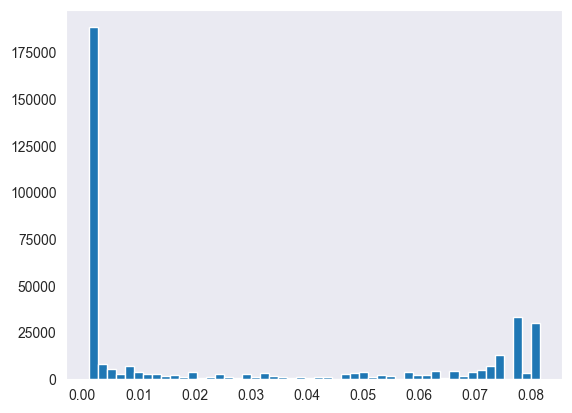

In [270]:
plt.hist(y_pred_proba, bins=50)

In [271]:
ev_space = np.linspace(0, 120, 40)
la_space = np.linspace(-60, 60, 40)
ev_grid, la_grid = np.meshgrid(ev_space, la_space)
X_grid = np.column_stack((ev_grid.ravel(), la_grid.ravel()))

In [272]:
pred_grid = xgb_clf.predict_proba(X_grid)[:,1]
y_proba_grid = pred_grid.reshape(ev_grid.shape)

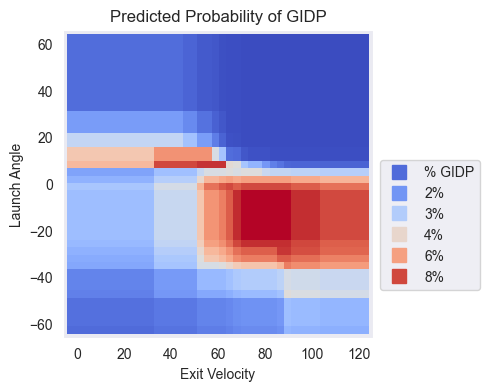

In [273]:

import matplotlib.lines as mlines
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
sns.scatterplot(x=ev_grid.ravel(), y=la_grid.ravel(), marker='s', s=200, hue=pred_grid, edgecolor='none', palette='coolwarm', label="% GIDP", legend=True)
plt.xlabel('Exit Velocity')
plt.ylabel('Launch Angle')
plt.title("""Predicted Probability of GIDP""")

handles, labels = ax.get_legend_handles_labels()
new_handles = []
for handle, label in zip(handles, labels):
    color = handle.get_facecolor()[0]
    new_handle = plt.Line2D([], [], marker='s', markersize=10, linestyle='', color=color)
    new_handles.append(new_handle)

# Convert labels to percentages
labels = ["{:.0%}".format(float(label)) if label.replace('.','',1).isdigit() else label for label in labels]

plt.legend(new_handles, labels, bbox_to_anchor=(1, 0.6), loc='upper left')
plt.show()

In [274]:
features = bbe['launch_angle'].values.reshape(-1, 1)


In [275]:
prob_gidp = clf.predict_proba(features)[:,1]

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<AxesSubplot: xlabel='launch_speed', ylabel='launch_angle'>

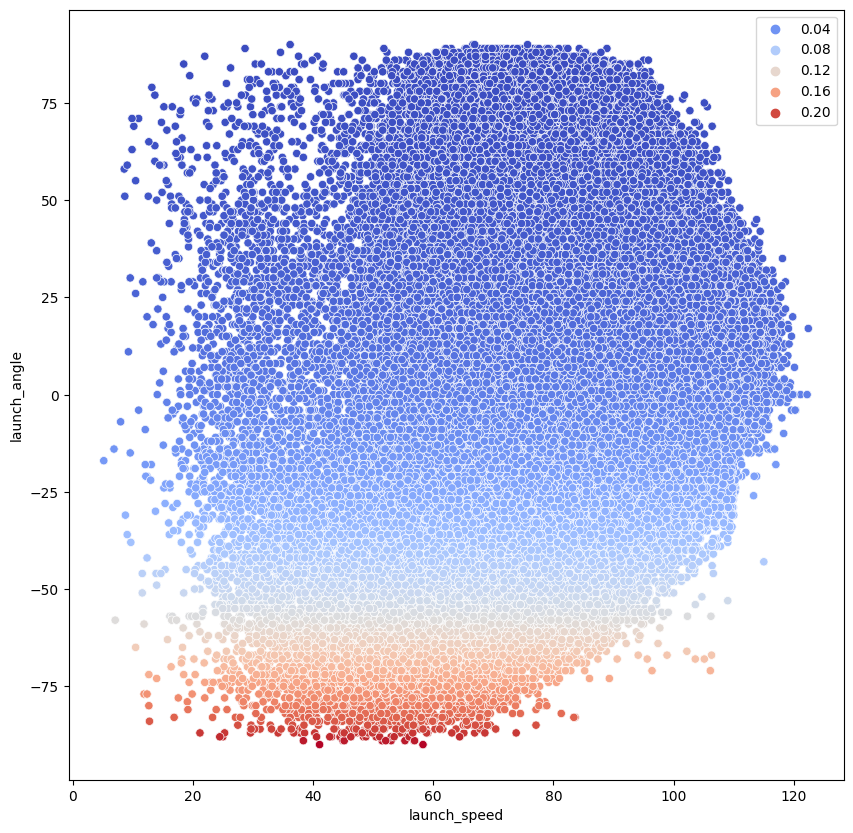

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=bbe, x='launch_speed', y='launch_angle', hue=prob_gidp, palette='coolwarm')

In [ ]:
bbe['gidp_prob'] = prob_gidp

In [ ]:
bbe.groupby('player_name')['gidp_prob'].agg(['mean', 'count', 'sum']).sort_values('sum', ascending=False).head(10)

,mean,count,sum
player_name,,,
"Alcantara, Sandy",0.032988,4728,155.968696
"Valdez, Framber",0.037271,3723,138.759979
"Webb, Logan",0.034265,3975,136.203935
"Gibson, Kyle",0.029241,4239,123.952422
"Corbin, Patrick",0.027941,4383,122.466641
"Stroman, Marcus",0.031818,3804,121.034892
"Wainwright, Adam",0.027216,4194,114.142075
"Berríos, José",0.026688,4125,110.089864
"Lyles, Jordan",0.025123,4362,109.587295


In [ ]:
gidps = bbe.loc[(bbe['events'] == 'grounded_into_double_play') & (bbe['description']=='hit_into_play')].groupby('player_name')['events'].count()

In [ ]:
gidps.sort_values(ascending=False).head(10)

player_name
Webb, Logan         171
Gibson, Kyle        144
Alcantara, Sandy    141
Valdez, Framber     141
Freeland, Kyle      141
Lyles, Jordan       129
Keller, Mitch       129
Corbin, Patrick     123
Dunning, Dane       123
Márquez, Germán     120
Name: events, dtype: int64

In [ ]:
import joblib

In [ ]:
joblib.dump(high_k, 'C:/Users/wampl/sxwOBA/models/gidp_prob_model.joblib')
joblib.dump(clf, 'C:/Users/wampl/sxwOBA/models/gidp_logistic_model.joblib')

['C:/Users/wampl/sxwOBA/models/gidp_logistic_model.joblib']

In [ ]:
df = pd.read_csv('C:/Users/wampl/sxwOBA/statcast_data/current.csv')

In [ ]:
df.loc[:, ['sxwOBA', 'sxwOBA_adj', 'gidp_adj']].head()

KeyError: "['sxwOBA_adj', 'gidp_adj'] not in index"